# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# Reading the csv data file to a pandas df

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# Naming the columns as column names are missing in the original csv

In [4]:
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [5]:
df

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# Changing values in the survival status columns from 1 and 2 to 0 and 1

In [6]:
for i in range(len(df)):
    if(df['survival_status'][i]==1):
        df['survival_status'][i]=0
    else:
        df['survival_status'][i]=1

In [7]:
print(df.head())
print(df.tail())

   patient_age  operation_year  positive_axillary_nodes  survival_status
0           30              62                        3                0
1           30              65                        0                0
2           31              59                        2                0
3           31              65                        4                0
4           33              58                       10                0
     patient_age  operation_year  positive_axillary_nodes  survival_status
300           75              62                        1                0
301           76              67                        0                0
302           77              65                        3                0
303           78              65                        1                1
304           83              58                        2                1


# Checking for null values and noisy data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

In [10]:
count=0
for x in df['patient_age']:
    if x<=0:
        count=count+1
count

0

In [11]:
count=0
for x in df['operation_year']:
    if x<=0:
        count=count+1
count

0

In [12]:
count=0
for x in df['positive_axillary_nodes']:
    if x<0:
        count=count+1
count

0

In [13]:
count=0
for x in df['survival_status']:
    if x!=1 & x!=0:
        count=count+1
count

0

# Checking the correlation of all columns

In [14]:
corr = df.corr()

In [15]:
corr

,patient_age,operation_year,positive_axillary_nodes,survival_status
patient_age,1.000000,0.092623,-0.066548,0.064351
operation_year,0.092623,1.000000,-0.003277,-0.004076
positive_axillary_nodes,-0.066548,-0.003277,1.000000,0.286191
survival_status,0.064351,-0.004076,0.286191,1.000000


### Plotting the correlation of columns

AxesSubplot(0.125,0.11;0.62x0.77)


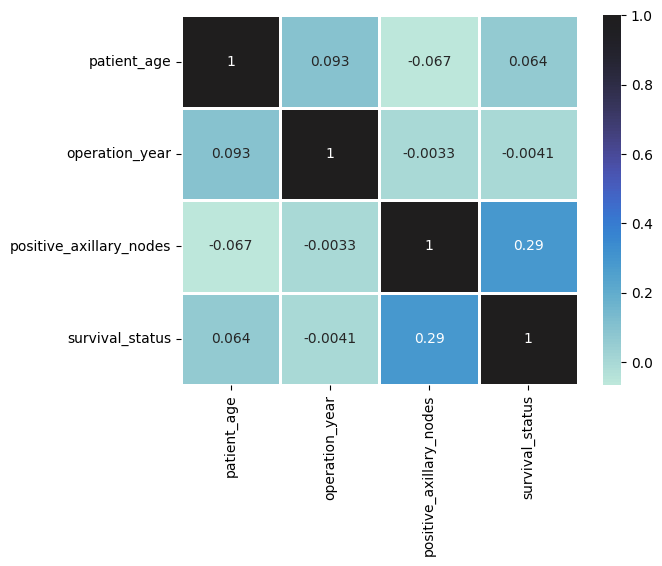

In [16]:
corrplt = sns.heatmap(corr, annot = True, linewidth = 1, cbar = True, center = 1) #cmap = )
print(corrplt)

In [17]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Since no columns are highly correlated we do not need to drop any column

# Visualizations and Inferences


### pairplots to identify which attributes give meaningful inferences

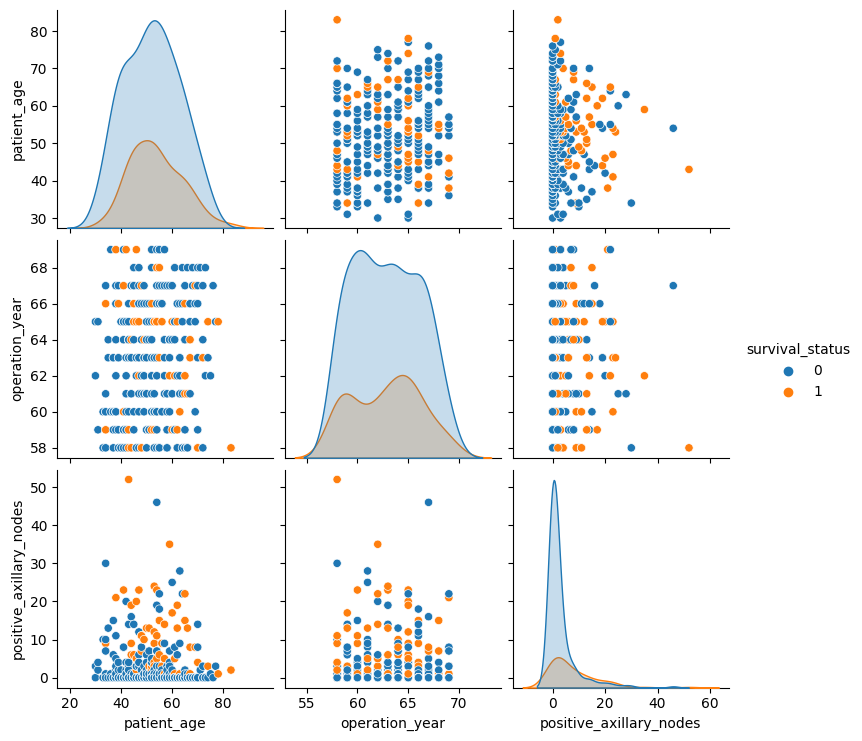

In [18]:
sns.pairplot(df, hue = 'survival_status')

In [19]:
list = df.groupby('patient_age')['survival_status'].mean().tolist()
print(list)

[0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.1, 0.16666666666666666, 0.0, 0.3, 0.2222222222222222, 0.36363636363636365, 0.42857142857142855, 0.3333333333333333, 0.5714285714285714, 0.2727272727272727, 0.42857142857142855, 0.2, 0.16666666666666666, 0.3333333333333333, 0.2857142857142857, 0.5454545454545454, 0.3076923076923077, 0.2, 0.2857142857142857, 0.2727272727272727, 0.0, 0.125, 0.3333333333333333, 0.3333333333333333, 0.42857142857142855, 0.125, 0.0, 0.4, 0.4, 0.3333333333333333, 0.0, 0.25, 0.2857142857142857, 0.0, 0.25, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 1.0]


<AxesSubplot: xlabel='patient_age', ylabel='survival_status'>

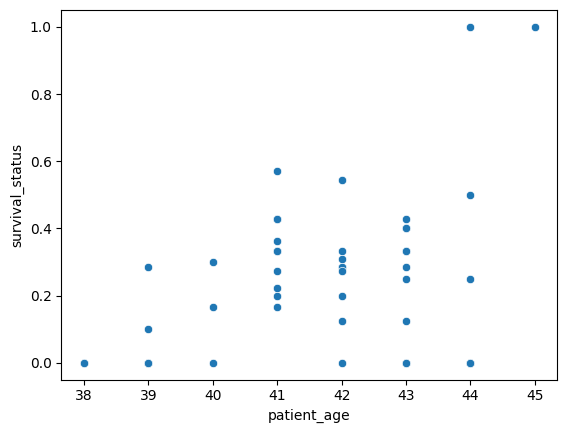

In [20]:
# why is this wrong?
survival_rate = df.groupby('patient_age')['survival_status'].mean()
sns.scatterplot(data=df, x='patient_age', y = survival_rate)

Text(0, 0.5, 'survival_rate')

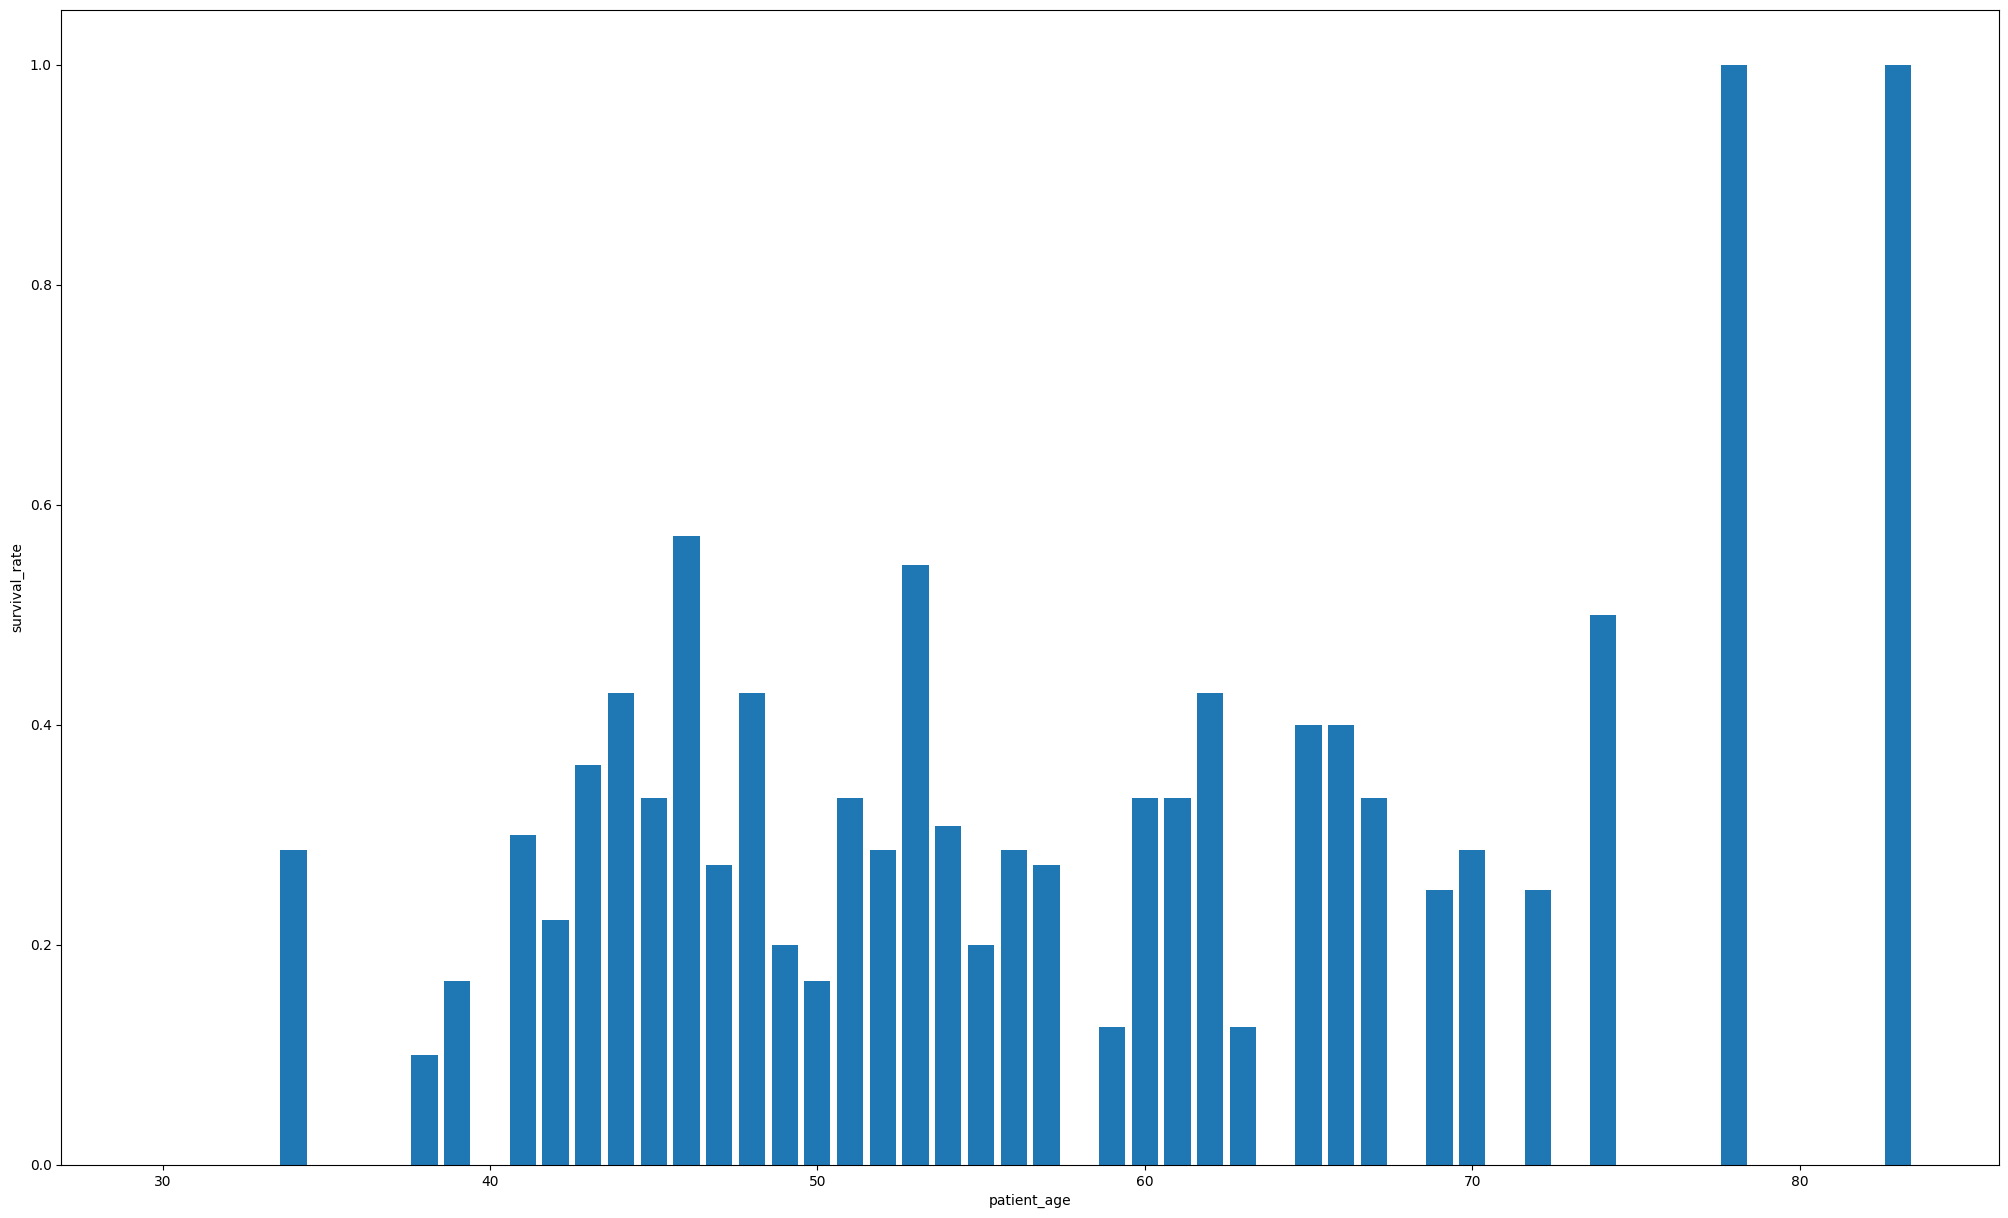

In [21]:
survival_rate = df.groupby('patient_age')['survival_status'].mean()

plt.figure(figsize=(25,15))
plt.bar(df.patient_age.unique(),survival_rate)
plt.xlabel("patient_age")
plt.ylabel("survival_rate")

Text(0, 0.5, 'survival_rate')

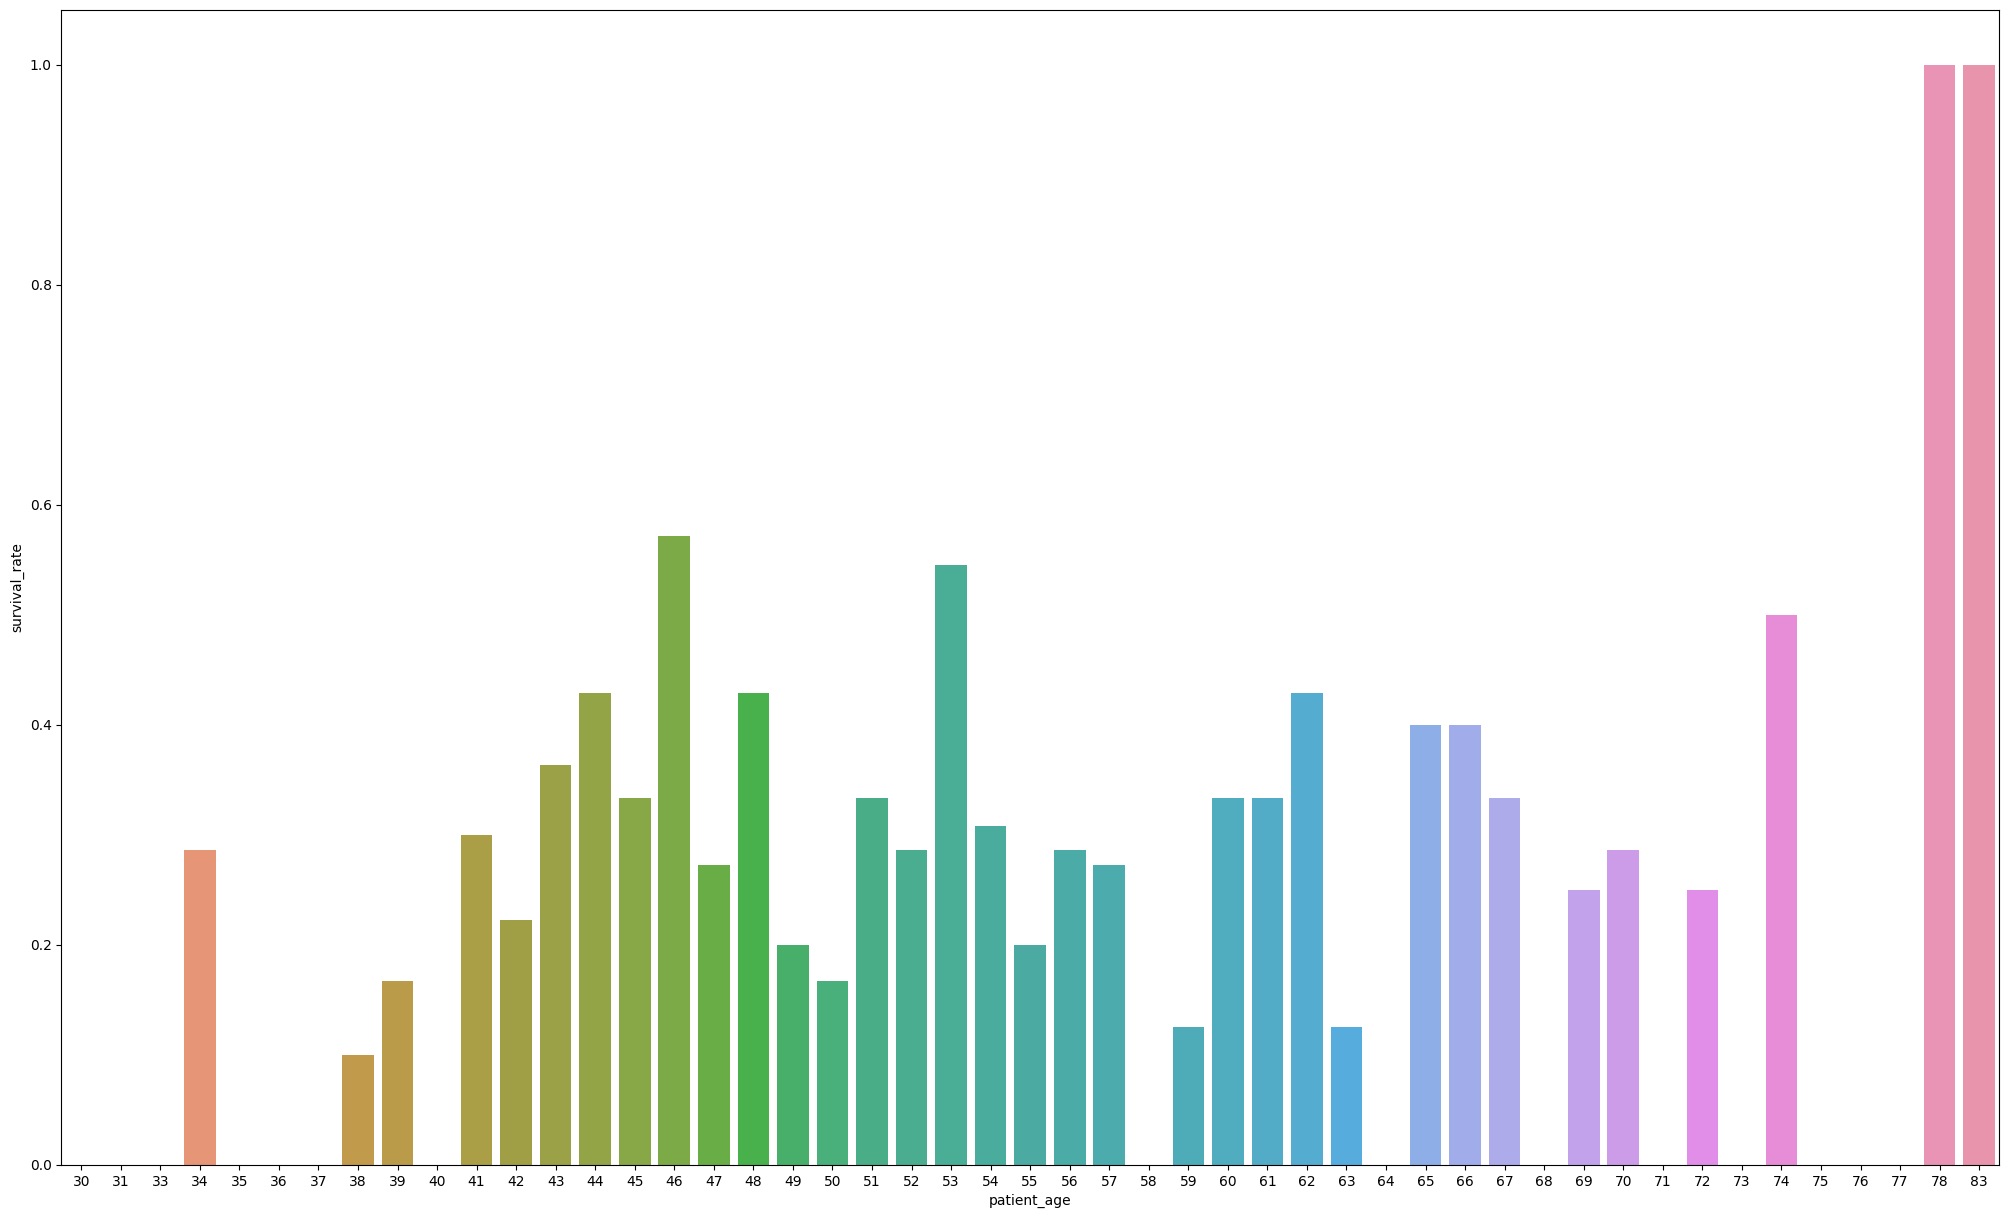

In [22]:
survival_rate = df.groupby('patient_age')['survival_status'].mean()

plt.figure(figsize=(25,15))
sns.barplot(x = df.patient_age.unique(),y = survival_rate)
plt.xlabel("patient_age")
plt.ylabel("survival_rate")

<AxesSubplot: xlabel='operation_year', ylabel='count'>

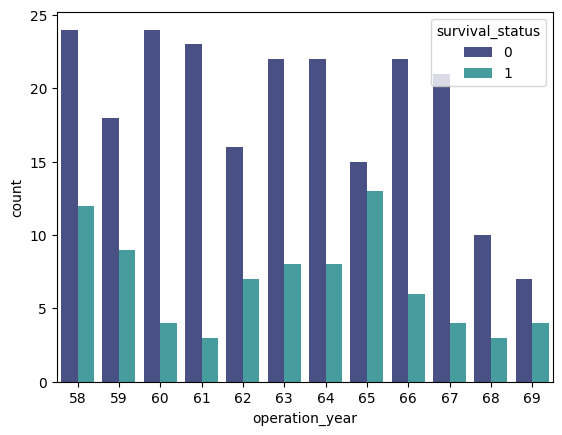

In [23]:

sns.countplot(x='operation_year',hue='survival_status',data=df,palette='mako')

<AxesSubplot: xlabel='patient_age', ylabel='count'>

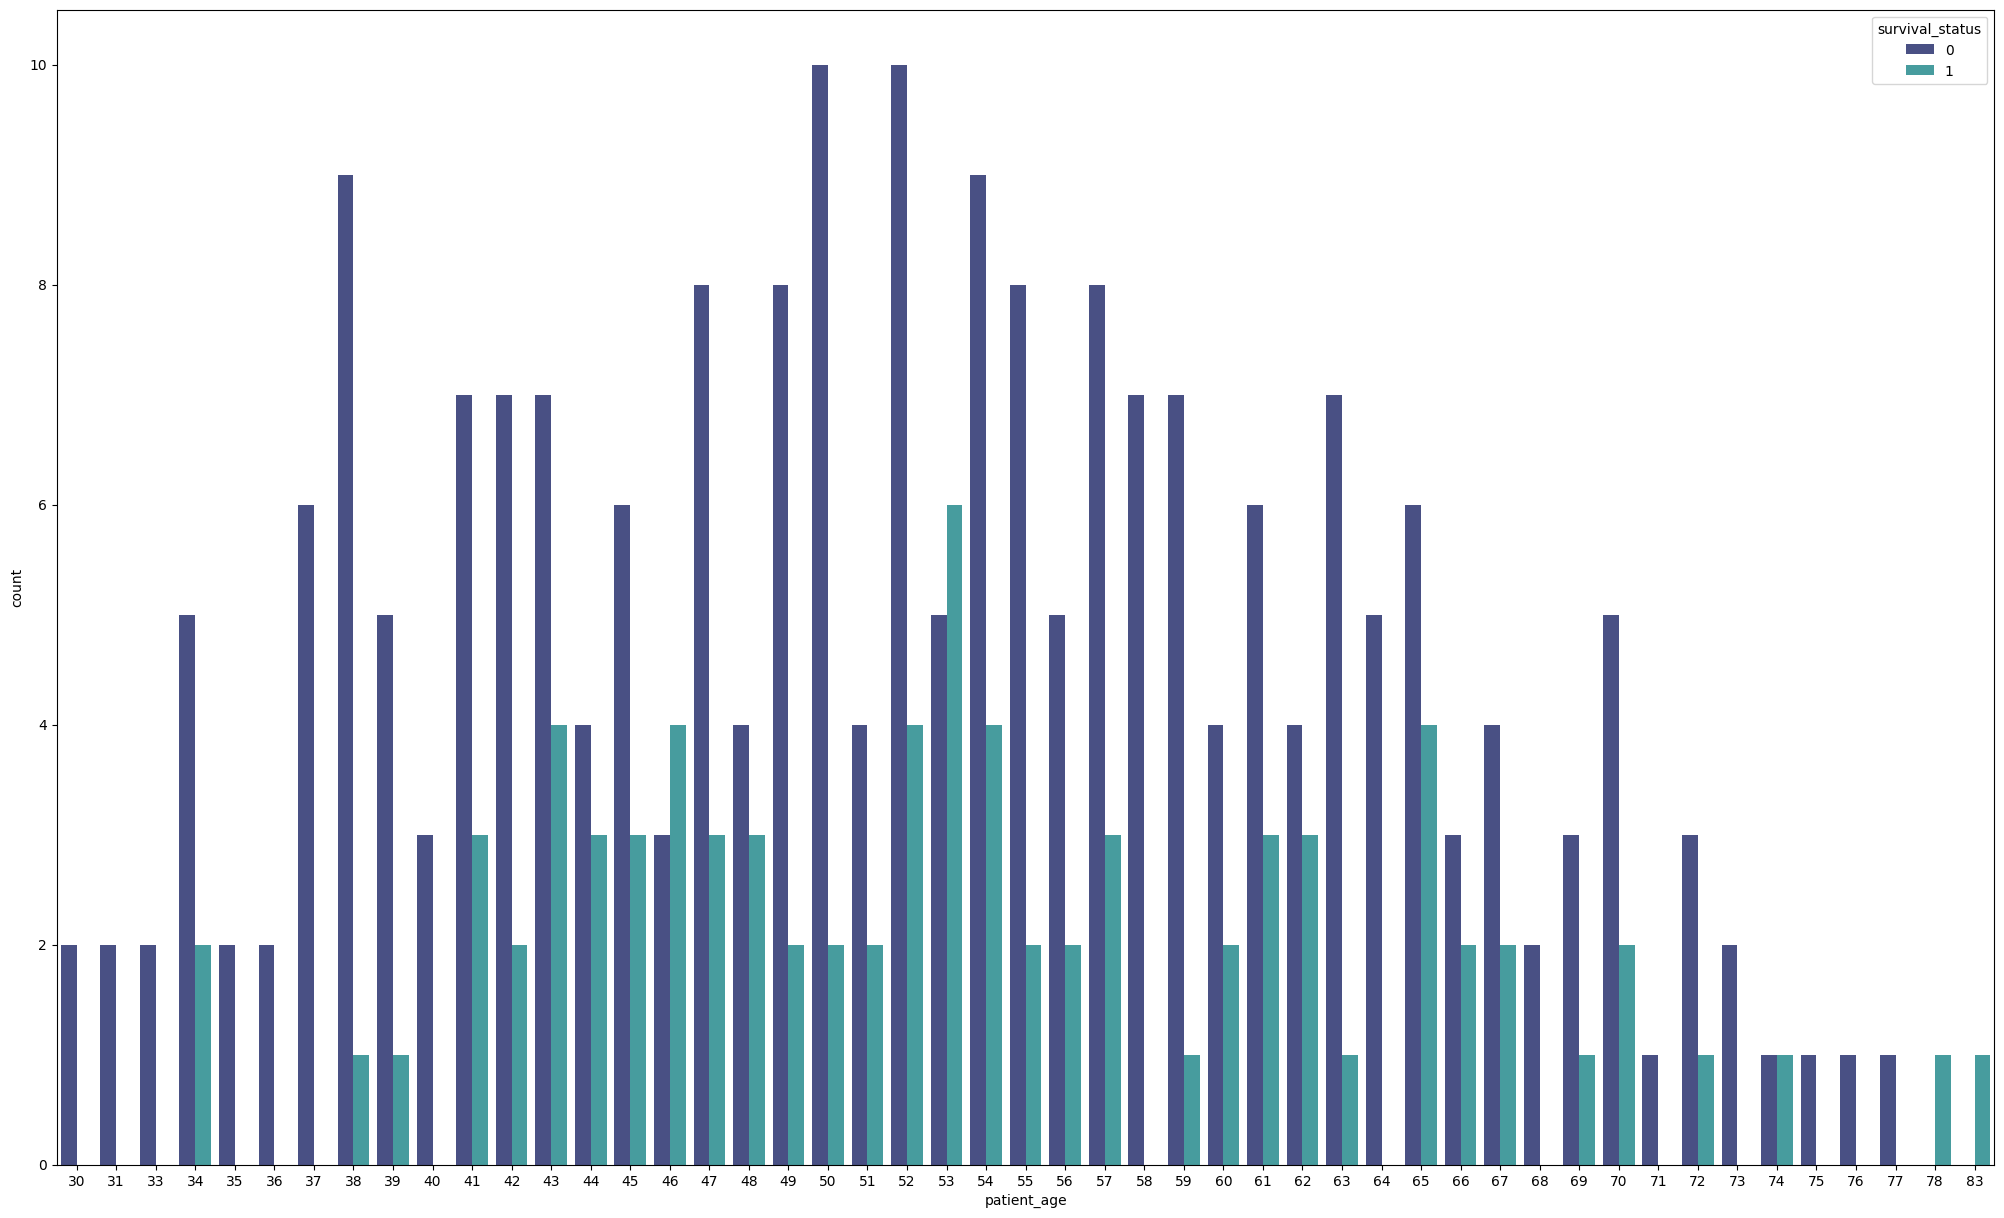

In [24]:
plt.figure(figsize=(25,15))
sns.countplot(x='patient_age',hue='survival_status',data=df,palette='mako')

### Box and whisker plots

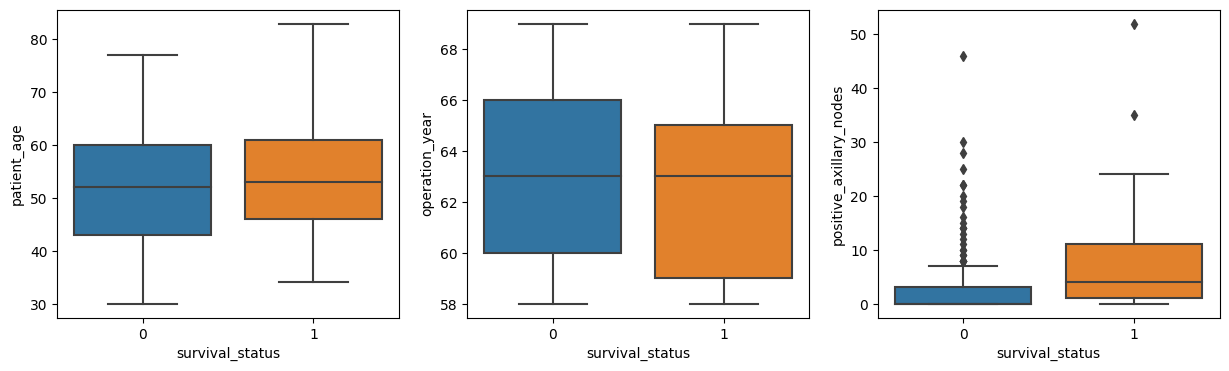

In [25]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status', y = 'operation_year', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df)
plt.show()

positive_axillary_nodes main outliers hai?